In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from itertools import product
import matplotlib.pyplot as plt

# load dataset 8

In [2]:
df = pd.read_csv('8_origination_charges.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156266 entries, 0 to 156265
Data columns (total 36 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   census_tract                              156157 non-null  float64
 1   action_taken                              156266 non-null  int64  
 2   loan_type                                 156266 non-null  int64  
 3   lien_status                               156266 non-null  int64  
 4   reverse_mortgage                          156266 non-null  int64  
 5   open_end_line_of_credit                   156266 non-null  int64  
 6   loan_amount                               156266 non-null  int64  
 7   combined_loan_to_value_ratio              154679 non-null  float64
 8   interest_rate                             156266 non-null  object 
 9   total_loan_costs                          77806 non-null   float64
 10  origination_charges 

In [4]:
# Select object (string) and category columns from your DataFrame
object_category_columns = df.select_dtypes(include=['object', 'category'])

# Print the names of the selected columns
print(object_category_columns.columns)


Index(['interest_rate', 'loan_term', 'property_value', 'total_units',
       'debt_to_income_ratio'],
      dtype='object')


In [5]:
print(df['loan_term'].value_counts())

loan_term
360       121656
180        20787
240         9185
120         2692
Exempt       451
           ...  
320            1
30             1
308            1
328            1
289            1
Name: count, Length: 121, dtype: int64


Description: The number of months after which the legal obligation will mature or terminate, or would have matured or terminated

In [6]:
unique_categories = df['loan_term'].nunique()
print("Number of Unique Categories:", unique_categories)

Number of Unique Categories: 121


In [7]:
# First, convert the 'loan_term ' column to numeric (float)
df['loan_term'] = pd.to_numeric(df['loan_term'], errors='coerce')

# Now, calculate the minimum, maximum, and median
minimum_interest_rate = df['loan_term'].min()
maximum_interest_rate = df['loan_term'].max()
median_interest_rate = df['loan_term'].median()

print("Minimum loan_term :", minimum_interest_rate)
print("Maximum loan_term :", maximum_interest_rate)
print("Median loan_term :", median_interest_rate)

Minimum loan_term : 11.0
Maximum loan_term : 480.0
Median loan_term : 360.0


# Check outliers

In [8]:
# Convert the 'loan_term ' column to numeric (float)
df['loan_term'] = pd.to_numeric(df['loan_term'], errors='coerce')  # 'coerce' handles non-numeric values by converting them to NaN

# Calculate the quantiles
Q1 = df['loan_term'].quantile(0.25)
Q3 = df['loan_term'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['loan_term'] < lower_bound) | (df['loan_term'] > upper_bound)]

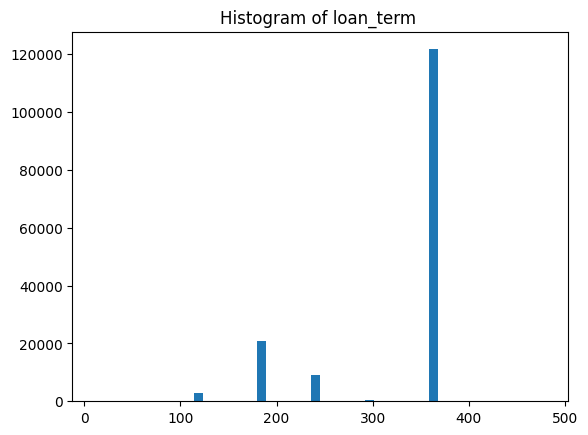

In [9]:
plt.hist(df['loan_term'], bins=50)  # Adjust the number of bins as needed
plt.title('Histogram of loan_term ')
plt.show()

[360. 240. 180.  nan 288. 300. 264. 480. 348. 120. 324. 336. 156. 144.
 204.  96.  60.  36. 366.  24. 312. 330. 121. 179. 369. 359. 252. 216.
  84. 350. 276. 132. 181. 168. 290. 294. 159. 228. 170. 200. 184. 192.
 280. 202. 239. 175. 349. 358. 333. 207. 354. 342. 353. 195. 315. 174.
 286. 241. 337. 205. 177. 234. 176. 150. 345. 295. 210. 260. 346. 335.
 215. 133. 220. 341. 316. 343. 267. 320.  72. 372.  48.  59.  30. 355.
 308. 328. 352. 356. 309. 142. 108.  11. 332. 306. 322. 258. 351. 165.
 298. 302. 158.  12. 222. 230. 344. 281. 296. 357. 282. 334. 160. 182.
 370. 235. 214. 340. 268. 262. 347. 317. 289.]
500


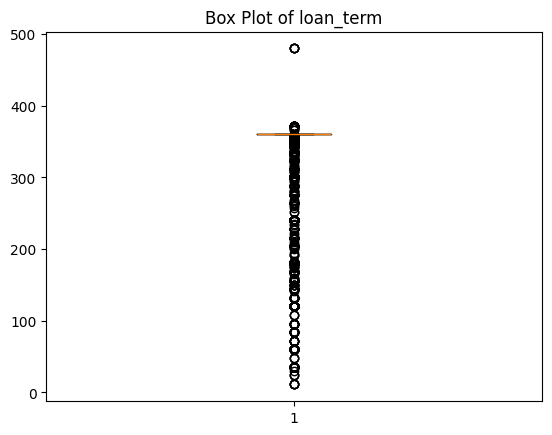

In [10]:
df1 = df.copy()
df1['loan_term'] = pd.to_numeric(df['loan_term'], errors='coerce')
df1 = df1.dropna(subset=['loan_term'])

print(df['loan_term'].unique())
print(df['loan_term'].isna().sum())

# Create a box plot of the 'combined_loan_to_value_ratio' column
plt.boxplot(df1['loan_term'])
plt.title('Box Plot of loan_term')
plt.show()

## The outliers make the data into a line.
We can draw a boxplot without the outliers.

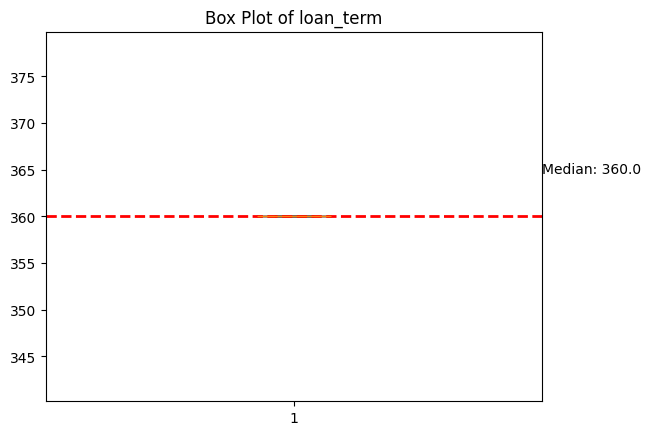

In [11]:
# Create a box plot of the 'loan_term ' column
plt.boxplot(df1['loan_term'], showfliers=False)  # Exclude outliers
plt.title('Box Plot of loan_term')

# Calculate the median value
median_value = df1['loan_term'].median()

# Add a median line
plt.axhline(median_value, color='r', linestyle='dashed', linewidth=2)

# Add text with the median value 5 pixels above the line
plt.text(1.5, median_value + 5, f'Median: {median_value}', va='center')

plt.show()


# Conclusion

removing outæiers might not be a good idea.

# Remove outliers?

In [12]:
# Calculate the IQR for loan_term 
Q1 = df1['loan_term'].quantile(0.15)
Q3 = df1['loan_term'].quantile(0.85)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean mask for outliers
outliers_mask = (df1['loan_term'] < lower_bound) | (df1['loan_term'] > upper_bound)

# Create a new DataFrame without outliers
df_no_outliers = df1[~outliers_mask]

# Display the number of removed outliers
print(f'Number of removed outliers: {outliers_mask.sum()}')

Number of removed outliers: 0


In [13]:
# Create a DataFrame of removed outliers
outliers_df = df1[outliers_mask]

In [14]:
# Display the values of the removed outliers
print(outliers_df['loan_term'])

Series([], Name: loan_term, dtype: float64)


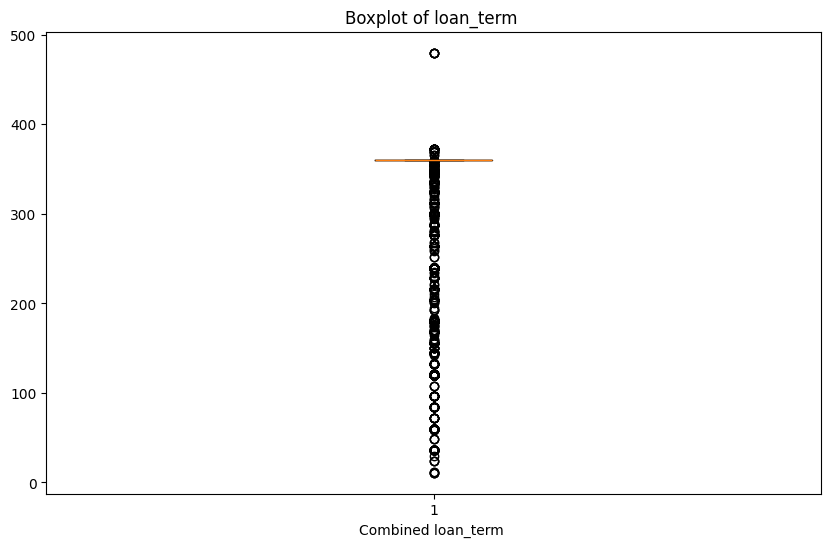

In [15]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_no_outliers['loan_term'])
plt.title('Boxplot of loan_term ')
plt.xlabel('Combined loan_term ')
plt.show()

We dont remove the outliers.

In [16]:
print(df1['loan_term'].value_counts())

loan_term
360.0    121656
180.0     20787
240.0      9185
120.0      2692
300.0       423
          ...  
320.0         1
30.0          1
308.0         1
328.0         1
289.0         1
Name: count, Length: 120, dtype: int64


# Make range categories

In [17]:
missing_values = df1['loan_term'].isna()
missing_values_count = missing_values.sum()
print(f"Number of missing values in 'loan_term': {missing_values_count}")

Number of missing values in 'loan_term': 0


In [18]:
new_df = df1.copy()

# Define custom categories based on the provided values
categories = {
    '1-2 years': (12, 24),   # 1-2 years
    '2-6 years': (24, 72),   # 2-6 years
    '7-11 years': (72, 132),  # 7-11 years
    '12-16 years': (132, 192),  # 12-16 years
    '17-21 years': (192, 252),  # 17-21 years
    '22-26 years': (252, 312),  # 22-26 years
    '27-31 years': (312, 372),  # 27-31 years
    '32-36 years': (372, 432),  # 32-36 years
    '37-41 years': (432, 492),  # 37-41 years
    '42-46 years': (492, 552),  # 42-46 years
}

# Create an empty list to store 'loan_term' values categorized as 'Other'
other_category_values = []

# Define a function to categorize 'loan_term' into the desired ranges
def categorize_loan_term(term):
    try:
        term = int(term)  # Convert to integer
    except (ValueError, TypeError):
        other_category_values.append(term)  # Add non-integer values to the list
        return 'Other'

    for category, (start, end) in categories.items():
        if start <= term <= end:
            return category
    other_category_values.append(term)  # Add 'loan_term' value to the list
    return 'Other'

# Apply the categorization function to the 'loan_term' column in the original DataFrame
df1['loan_term'] = df1['loan_term'].apply(categorize_loan_term)

# Print the result
print(df1['loan_term'].value_counts())

# Print the 'loan_term' values in the 'Other' category
print("Values in 'Other' category:", other_category_values)



loan_term
27-31 years    122026
12-16 years     20972
17-21 years      9258
7-11 years       2792
22-26 years       534
2-6 years         171
37-41 years         5
1-2 years           5
Other               3
Name: count, dtype: int64
Values in 'Other' category: [11, 11, 11]


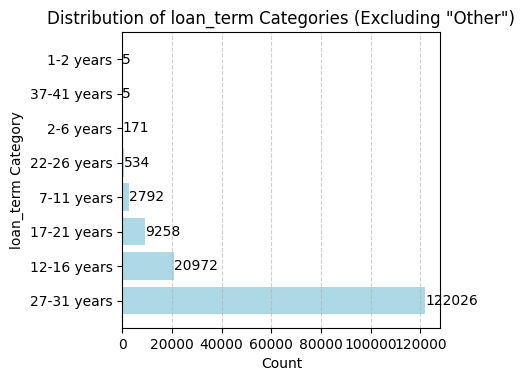

In [19]:
# Filter the DataFrame to exclude the 'Other' category
filtered_df = df1[df1['loan_term'] != 'Other']

# Get the value counts for the filtered DataFrame
value_counts = filtered_df['loan_term'].value_counts()

# Create a horizontal bar chart
plt.figure(figsize=(6, 5))  # Increase the figure size
plt.barh(value_counts.index, value_counts.values, color='lightblue')
plt.xlabel('Count')
plt.ylabel('loan_term Category')
plt.title('Distribution of loan_term Categories (Excluding "Other")')
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Add a grid

# Display the counts on the right of the bars with some spacing
for i, count in enumerate(value_counts.values):
    plt.text(count + 8, i, str(count), va='center')

plt.tight_layout(pad=5)  # Adjust padding
plt.show()


In [20]:
df1.to_csv('9_loan_term.csv', index=False)